## Assignment 4
## Group Members:
## M. Rohan Javed L21-5625
## Abdullah Asghar L21-5662
## Rana Suleiman Asif L21-1818
## Hammad Tufail L21-5412

### Part 1: Data Preprocessing

In [ ]:
# Install required libraries
!pip install datasets transformers peft accelerate bitsandbytes

from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Load dataset and select 5000 samples
dataset = load_dataset("ccdv/arxiv-summarization")
data = dataset['train'].select(range(5000))

# Extract Input-Target Pairs
articles = data['article']
summaries = data['abstract']

# Train-Validation-Test Split
train_articles, temp_articles, train_summaries, temp_summaries = train_test_split(
    articles, summaries, test_size=0.2, random_state=42)
val_articles, test_articles, val_summaries, test_summaries = train_test_split(
    temp_articles, temp_summaries, test_size=0.5, random_state=42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

train-00000-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00001-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00002-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00003-of-00015.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

train-00004-of-00015.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00005-of-00015.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

train-00006-of-00015.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00007-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00008-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00009-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00010-of-00015.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00011-of-00015.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

train-00012-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00013-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00014-of-00015.parquet:   0%|          | 0.00/235M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/203037 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6436 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6440 [00:00<?, ? examples/s]

### Part 2: LoRA Fine-Tuning

In [ ]:
!pip install -U transformers


In [ ]:
!pip install -q transformers datasets peft accelerate

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import LoraConfig, get_peft_model, TaskType
from datasets import load_dataset
from torch.utils.data import DataLoader
from torch.optim import AdamW  # ← Correct source

# Load model and tokenizer
model_id = "facebook/opt-125m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Apply LoRA
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)
model = get_peft_model(model, lora_config)

# Load dataset (small subset for demo)
dataset = load_dataset("ccdv/arxiv-summarization")['train'].select(range(200))
tokenized = dataset.map(lambda x: tokenizer(x['article'], truncation=True, padding="max_length", max_length=512), batched=True)

# Minimal data loader
tokenized.set_format(type='torch', columns=['input_ids', 'attention_mask'])
dataloader = DataLoader(tokenized, batch_size=8, shuffle=True)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-4)

# Training loop
model.train()
for epoch in range(4):  # 4 epochs
    print(f"Epoch {epoch+1}")
    for batch in dataloader:
        inputs = batch['input_ids'].to(device)
        attention = batch['attention_mask'].to(device)
        outputs = model(input_ids=inputs, attention_mask=attention, labels=inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Loss: {loss.item():.4f}")

# Save model
model.save_pretrained("./lora-opt-125m-pytorch")


Epoch 1
Loss: 3.8986
Loss: 3.8583
Loss: 3.8076
Loss: 3.9680
Loss: 3.7524
Loss: 3.6284
Loss: 3.8893
Loss: 3.5522
Loss: 3.7912
Loss: 3.6256
Loss: 3.6831
Loss: 3.6523
Loss: 3.7110
Loss: 3.7507
Loss: 3.7742
Loss: 3.8117
Loss: 3.6531
Loss: 3.8307
Loss: 3.6629
Loss: 3.6137
Loss: 3.5394
Loss: 3.6997
Loss: 3.5851
Loss: 3.6359
Loss: 4.6263
Epoch 2
Loss: 3.6865
Loss: 3.5066
Loss: 3.5801
Loss: 3.6892
Loss: 4.4949
Loss: 3.4594
Loss: 3.5479
Loss: 3.6018
Loss: 3.5921
Loss: 3.7759
Loss: 3.7303
Loss: 3.5393
Loss: 3.5195
Loss: 3.6400
Loss: 3.6463
Loss: 3.5952
Loss: 3.4787
Loss: 3.5868
Loss: 3.6201
Loss: 3.7077
Loss: 3.5154
Loss: 3.5906
Loss: 3.4686
Loss: 3.6625
Loss: 3.2973
Epoch 3
Loss: 3.5433
Loss: 3.6329
Loss: 3.3281
Loss: 3.6653
Loss: 3.7485
Loss: 3.4677
Loss: 3.6869
Loss: 3.5519
Loss: 3.5943
Loss: 3.4823
Loss: 3.3441
Loss: 3.5246
Loss: 3.5017
Loss: 3.5383
Loss: 3.3970
Loss: 3.3858
Loss: 3.7454
Loss: 4.1572
Loss: 3.4705
Loss: 3.4150
Loss: 3.4387
Loss: 3.4963
Loss: 3.5142
Loss: 3.4696
Loss: 3.5552
E

### Part 3: Inference and Output

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
import torch

# Load tokenizer and base model
model_id = "facebook/opt-125m"
tokenizer = AutoTokenizer.from_pretrained(model_id)
base_model = AutoModelForCausalLM.from_pretrained(model_id)

# Load LoRA-adapted model
model = PeftModel.from_pretrained(base_model, "./lora-opt-125m-pytorch")
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Use a small number of test samples (use same test split as in training script)
from datasets import load_dataset
from sklearn.model_selection import train_test_split

dataset = load_dataset("ccdv/arxiv-summarization")['train'].select(range(5000))
_, temp_texts, _, temp_summaries = train_test_split(
    dataset['article'], dataset['abstract'], test_size=0.2, random_state=42)
test_texts, _, test_summaries, _ = train_test_split(
    temp_texts, temp_summaries, test_size=0.5, random_state=42)

# Run inference on 10 test samples
for i in range(10):
    input_text = test_texts[i]
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    summary_ids = model.generate(**inputs, max_new_tokens=150, do_sample=False)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    print(f"\n\n📝 Original:\n{input_text[:500]}...")
    print(f"\n📌 Ground Truth:\n{test_summaries[i]}")
    print(f"\n🔍 LoRA Summary:\n{summary}")




📝 Original:
the grassmann manifolds ( sometimes , referred to as simply the grassmannian ) which parametrize vector subspaces of fixed dimensions of a given vector space are fundamental objects , and appear in many areas of mathematics . 
 their study dates back to plcker who , in the 19th century , considered the case of vector subspaces of dimension @xmath3 of a space of dimension @xmath4 . in this note 
 we study the integral cohomology of _ real _ grassmann manifolds . 
 the cohomology of _ complex _ gr...

📌 Ground Truth:
we give an explicit and simple construction of the incidence graph for the integral cohomology of _ real _ grassmann manifold @xmath0 in terms of the young diagrams filled with the letter @xmath1 in checkered pattern . 
 it turns out that there are two types of graphs , one for the trivial coefficients and other for the twisted coefficients , and they compute the homology groups of the orientable and non - orientable cases of @xmath0 via the poincar - verdier d

### Part 4: Evaluation (Quantitative)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.8 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho


🔍 Average Evaluation Scores:
ROUGE-1      0.237976
ROUGE-L      0.129881
BLEU         0.030619
BERTScore    0.817074
dtype: float64


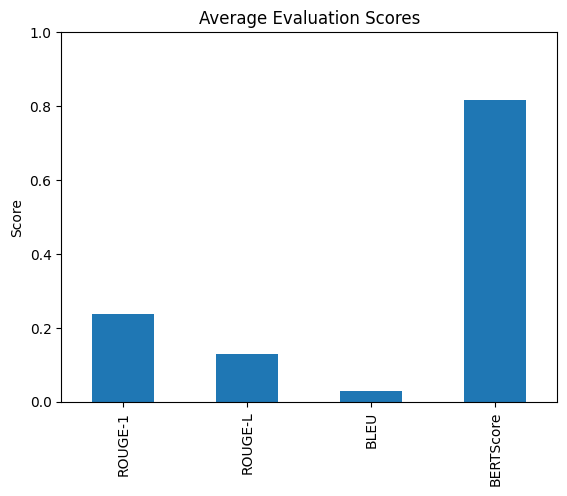

In [ ]:
!pip install -q rouge-score nltk bert-score

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from bert_score import score as bert_score
import matplotlib.pyplot as plt
import pandas as pd

# Reuse test_texts and test_summaries from earlier
rouge_1_list, rouge_l_list, bleu_list, bert_list = [], [], [], []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

model.eval()
for i in range(10):  # Evaluate on 10 test samples
    input_text = test_texts[i]
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    summary_ids = model.generate(**inputs, max_new_tokens=150, do_sample=False)
    generated = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    reference = test_summaries[i]

    # ROUGE scores
    scores = scorer.score(reference, generated)
    rouge_1_list.append(scores["rouge1"].fmeasure)
    rouge_l_list.append(scores["rougeL"].fmeasure)

    # BLEU
    bleu = sentence_bleu([reference.split()], generated.split())
    bleu_list.append(bleu)

    # BERTScore
    P, R, F1 = bert_score([generated], [reference], lang="en", verbose=False)
    bert_list.append(F1[0].item())

# Prepare results
results_df = pd.DataFrame({
    "ROUGE-1": rouge_1_list,
    "ROUGE-L": rouge_l_list,
    "BLEU": bleu_list,
    "BERTScore": bert_list
})

# Display average scores
print("\n🔍 Average Evaluation Scores:")
print(results_df.mean())

# Plot scores
results_df.mean().plot(kind="bar", title="Average Evaluation Scores")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()
